In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json

from helper import QUERY
from monte_carlo import run_monte_carlo_simulation, calculate_monte_carlo_performance_metrics

/Users/louisspencer/Desktop/Trading-Bot/.venv/lib/python3.11/site-packages/numba/core/decorators.py:250: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


In [2]:
def plot_overall_performance_metrics():
    all_sharpes = all_metrics['backtest_results'].apply(lambda x: json.loads(x)['sharpe_ratio'])
    all_sortinos = all_metrics['backtest_results'].apply(lambda x: json.loads(x)['sortino_ratio'])
    all_calmar_ratios = all_metrics['backtest_results'].apply(lambda x: json.loads(x)['calmar_ratio'])
    n = len(all_sharpes)

    # Probability of Sharpe Ratio >= 1
    p_sharpe = np.sum(all_sharpes >= 1) / n

    # Probability of Sortino Ratio >= 1
    p_sortino = np.sum(all_sortinos >= 1) / n

    # Probability of Calmar Ratio >= 1
    p_calmar = np.sum(all_calmar_ratios >= 1) / n

    # Median Sharpe Ratio
    median_sharpe = np.median(all_sharpes)

    # Median Sortino Ratio
    median_sortino = np.median(all_sortinos)

    # Median Calmar Ratio
    median_calmar = np.median(all_calmar_ratios)

    print(f'Median Sharpe Ratio: {median_sharpe:0.2f}')
    print(f'Median Sortino Ratio: {median_sortino:0.2f}')
    print(f'Median Calmar Ratio: {median_calmar:0.2f}')
    print()
    print(f'Probability of Sharpe Ratio >= 1: {p_sharpe:0.2f}')
    print(f'Probability of Sortino Ratio >= 1: {p_sortino:0.2f}')
    print(f'Probability of Calmar Ratio >= 1: {p_calmar:0.2f}')

    fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))

    # Histogram of all Sharpe Ratios for a given strategy
    axs[0].set_title(f'Distribution of all Sharpe Ratios for {strat} (n = {n})')
    axs[0].set_xlabel('Sharpe Ratio')
    axs[0].grid()
    sns.histplot(all_sharpes, ax = axs[0], stat = 'probability', color = 'green')

    # Histogram of Sortino Ratios for a given strategy
    axs[1].set_title(f'Distribution of all Sortino Ratios for {strat} (n = {n})')
    axs[1].set_xlabel('Sortino Ratio')
    axs[1].grid()
    sns.histplot(all_sortinos, ax = axs[1], stat = 'probability', color = 'blue');

    # Histogram of all Calmar Ratios for a given strategy
    axs[2].set_title(f'Distribution of all Calmar Ratios for {strat} (n = {n})')
    axs[2].set_xlabel('Calmar Ratio')
    axs[2].grid()
    sns.histplot(all_calmar_ratios, ax = axs[2], stat = 'probability', color = 'red')

    plt.tight_layout();

def plot_in_sample_vs_out_of_sample_sharpe_ratios():
    is_sharpe = all_metrics['backtest_results'].apply(lambda x: json.loads(x)['is_sharpe']).sum()
    oos_sharpe = all_metrics['backtest_results'].apply(lambda x: json.loads(x)['oos_sharpe']).sum()
    df = pd.DataFrame({
        'is_sharpe': is_sharpe,
        'oos_sharpe': oos_sharpe
    })
    # Scatter plot of In-Sample Sharpe Ratios vs. Out-of-Sample Sharpe Ratios
    r = df.corr().iloc[0, 1]
    r_2 = r ** 2

    plt.figure(figsize = (10, 5))
    plt.title(f'In-Sample vs. Out-of-Sample Sharpe Ratios for {strat} (r = {r:.2f}, r^2 = {r_2:.2f})')
    plt.xlabel('In-Sample Sharpe Ratio')
    plt.ylabel('Out-of-Sample Sharpe Ratio')
    plt.grid()

    sns.regplot(x = 'is_sharpe', y = 'oos_sharpe', data = df)

    plt.tight_layout();

def plot_strategy_equity_curve():
    # Calculate buy and hold equity curve
    buy_and_hold_equity_curve = price_data[['price_close']]
    buy_and_hold_equity_curve['equity'] = 10_000 * (1 + buy_and_hold_equity_curve['price_close'].pct_change().fillna(0)).cumprod()

    # Plot equity curve for a given strategy
    plt.figure(figsize = (10, 5))
    plt.title(f'Equity Curve for {strat} on {symbol_id}')
    plt.xlabel('Date')
    plt.ylabel('Equity')
    plt.grid()        

    plt.plot(strategy_equity_curve['date'], strategy_equity_curve['equity'])
    # plt.plot(buy_and_hold_equity_curve.index.values, buy_and_hold_equity_curve['equity'])

    plt.legend([strat, 'Buy and Hold'])

    plt.tight_layout();

def plot_price_data():
    # Plot Price Data
    plt.figure(figsize = (10, 5))
    plt.title(f'Price Data for {symbol_id}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.grid()

    # Scatter plot of trades and price data
    for i in range(len(trades_data)):
        entry_date = trades_data.iloc[i]['entry_date']
        exit_date = trades_data.iloc[i]['exit_date']

        entry_price = price_data.loc[entry_date, 'price_close']
        exit_price = price_data.loc[exit_date, 'price_close']

        plt.scatter(entry_date, entry_price, color = 'green', marker = '^')
        plt.scatter(exit_date, exit_price, color = 'red', marker = 'v')

    plt.plot(price_data.index, price_data['price_close'])

    plt.tight_layout();

def plot_monte_carlo_equity_curves():
    sampled_equity_curves = np.random.choice(monte_carlo_equity_curves.columns, 250)
    title = 'Monte Carlo Simulations of Equity Curves Over Time'
    monte_carlo_equity_curves[sampled_equity_curves].plot(figsize = (20, 5), legend = False)

    plt.title(title)
    plt.xlabel('Date')
    plt.grid()
    plt.ylabel('Simulated Equity Value (USD)');

def plot_bootstrapped_sharpe_sortino_calmar_ratios():
    fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 5))

    # Probability of Sharpe Ratio being greater than 1
    sharpe_ratio_prob = (np.array(monte_carlo_risk_metrics['sharpe_ratio']) > 1).mean()
    sortino_ratio_prob = (np.array(monte_carlo_risk_metrics['sortino_ratio']) > 1).mean()
    calmar_ratio_prob = (np.array(monte_carlo_risk_metrics['calmar_ratio']) > 1).mean()

    # Median Sharpe Ratio
    median_sharpe_ratio = np.median(monte_carlo_risk_metrics['sharpe_ratio'])
    median_sortino_ratio = np.median(monte_carlo_risk_metrics['sortino_ratio'])
    median_calmar_ratio = np.median(monte_carlo_risk_metrics['calmar_ratio'])

    # 95% Confidence Interval for Sharpe Ratio
    sharpe_ratio_ci = np.percentile(monte_carlo_risk_metrics['sharpe_ratio'], [2.5, 97.5])
    sortino_ratio_ci = np.percentile(monte_carlo_risk_metrics['sortino_ratio'], [2.5, 97.5])
    calmar_ratio_ci = np.percentile(monte_carlo_risk_metrics['calmar_ratio'], [2.5, 97.5])

    print(f'Probability of Sharpe Ratio > 1: {sharpe_ratio_prob:.2f}')
    print(f'Probability of Sortino Ratio > 1: {sortino_ratio_prob:.2f}')
    print(f'Probability of Calmar Ratio > 1: {calmar_ratio_prob:.2f}')
    print()
    print(f'Median Sharpe Ratio: {median_sharpe_ratio:.2f}')
    print(f'Median Sortino Ratio: {median_sortino_ratio:.2f}')
    print(f'Median Calmar Ratio: {median_calmar_ratio:.2f}')
    print()
    print(f'95% Confidence Interval for Sharpe Ratio: {sharpe_ratio_ci}')
    print(f'95% Confidence Interval for Sortino Ratio: {sortino_ratio_ci}')
    print(f'95% Confidence Interval for Calmar Ratio: {calmar_ratio_ci}')

    # Histogram of Monte Carlo Sharpe Ratios
    axs[0].set_title('Distribution of 2,000 Monte Carlo Sharpe Ratios')
    axs[0].set_xlabel('Sharpe Ratio')
    axs[0].grid()
    sns.histplot(monte_carlo_risk_metrics['sharpe_ratio'], ax = axs[0], stat = 'probability', color = 'green')

    # Histogram of Monte Carlo Sortino Ratios
    axs[1].set_title('Distribution of 2,000 Monte Carlo Sortino Ratios')
    axs[1].set_xlabel('Sortino Ratio')
    axs[1].grid()
    sns.histplot(monte_carlo_risk_metrics['sortino_ratio'], ax = axs[1], stat = 'probability', color = 'blue');

    # Histogram of Monte Carlo Calmar Ratios
    axs[2].set_title('Distribution of 2,000 Monte Carlo Calmar Ratios')
    axs[2].set_xlabel('Calmar Ratio')
    axs[2].grid()
    sns.histplot(monte_carlo_risk_metrics['calmar_ratio'], ax = axs[2], stat = 'probability', color = 'red')

    plt.tight_layout();

def plot_bootstrapped_drawdowns():
    fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))

    # Risk of Ruin
    risk_of_ruin = (np.array(monte_carlo_risk_metrics['max_dd']) >= 0.20).mean()

    # Median Avg. Drawdown and Max Drawdown
    median_avg_dd = np.median(monte_carlo_risk_metrics['avg_dd'])
    median_max_dd = np.median(monte_carlo_risk_metrics['max_dd'])

    # 95% Confidence Interval for Avg. Drawdown and Max Drawdown
    avg_dd_ci = np.percentile(monte_carlo_risk_metrics['avg_dd'], [2.5, 97.5])
    max_dd_ci = np.percentile(monte_carlo_risk_metrics['max_dd'], [2.5, 97.5])

    print(f'Risk of Ruin: {risk_of_ruin:.2f}')
    print()
    print(f'Median Avg. Drawdown: {median_avg_dd:.2f}%')
    print(f'Median Max Drawdown: {median_max_dd:.2f}%')
    print()
    print(f'95% Confidence Interval for Avg. Drawdown: {avg_dd_ci}')
    print(f'95% Confidence Interval for Max Drawdown: {max_dd_ci}')

    plt.subplot(121)
    axs[0].set_title('Distribution of 2,000 Monte Carlo Avg. Drawdowns (%)')
    axs[0].set_xlabel('Avg. Drawdown (%)')
    axs[0].grid()

    # Histogram of Avg. Drawdown Pcts.
    sns.histplot(monte_carlo_risk_metrics['avg_dd'], ax = axs[0], stat = 'probability')
    plt.grid()

    plt.subplot(121)
    axs[1].set_title('Distribution of 2,000 Monte Carlo Max Drawdowns (%)')
    axs[1].set_xlabel('Max Drawdown (%)')
    axs[1].grid()

    # Histogram of Monte Carlo Max Drawdown Pcts.
    sns.histplot(monte_carlo_risk_metrics['max_dd'], ax = axs[1], stat = 'probability')
    plt.grid();


In [3]:
symbol_ids = QUERY(
"""
SELECT DISTINCT symbol_id
FROM backtest.backtest_results
ORDER BY symbol_id
"""
)
symbol_ids

,symbol_id
0,BNB_USDT_BINANCE
1,BTC_USD_COINBASE
2,CRV_USDT_OKEX
3,ETH_USD_COINBASE
4,FLOKI_USDT_BINANCE
5,GALA_USD_COINBASE
6,RUNE_USDT_BINANCE
7,XEC_USDT_BINANCE


In [4]:
strats = QUERY(
"""
SELECT DISTINCT strat
FROM backtest.backtest_results
"""
)
strats

,strat
0,MLStrategy
1,MACrossOver


In [46]:
symbol_id = 'RUNE_USDT_BINANCE'
strat = 'MLStrategy'

In [47]:
all_metrics = QUERY(
f"""
SELECT *
FROM backtest.backtest_results
WHERE
    strat = '{strat}'
"""
)
strategy_equity_curve = QUERY(
f"""
SELECT *
FROM backtest.backtest_equity_curves
WHERE
    symbol_id = '{symbol_id}' AND
    strat = '{strat}'
ORDER BY date
"""
)
price_data = QUERY(
f"""
SELECT *
FROM market_data.price_data_1m
WHERE 
      asset_id_base || '_' || asset_id_quote || '_' || exchange_id = '{symbol_id}'
"""
).set_index('time_period_end')[['price_open', 'price_high', 'price_low', 'price_close', 'volume_traded', 'trades_count']]
price_data = price_data.resample('30min', label = 'right', closed = 'right').agg({
    'price_open': 'first',
    'price_high': 'max',
    'price_low': 'min',
    'price_close': 'last',
    'volume_traded': 'sum',
    'trades_count': 'sum'
}).interpolate(method = 'time')
trades_data = QUERY(
    f"""
    SELECT *
    FROM backtest.backtest_trades
    WHERE
        symbol_id = '{symbol_id}' AND
        strat = '{strat}'
    """
)


# monte_carlo_equity_curves = run_monte_carlo_simulation(strategy_equity_curve[['equity']])
# monte_carlo_equity_curves.index = strategy_equity_curve['date']
# monte_carlo_risk_metrics = calculate_monte_carlo_performance_metrics(monte_carlo_equity_curves)

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Median Sharpe Ratio: 0.54
Median Sortino Ratio: 0.38
Median Calmar Ratio: 0.21

Probability of Sharpe Ratio >= 1: 0.25
Probability of Sortino Ratio >= 1: 0.12
Probability of Calmar Ratio >= 1: 0.12


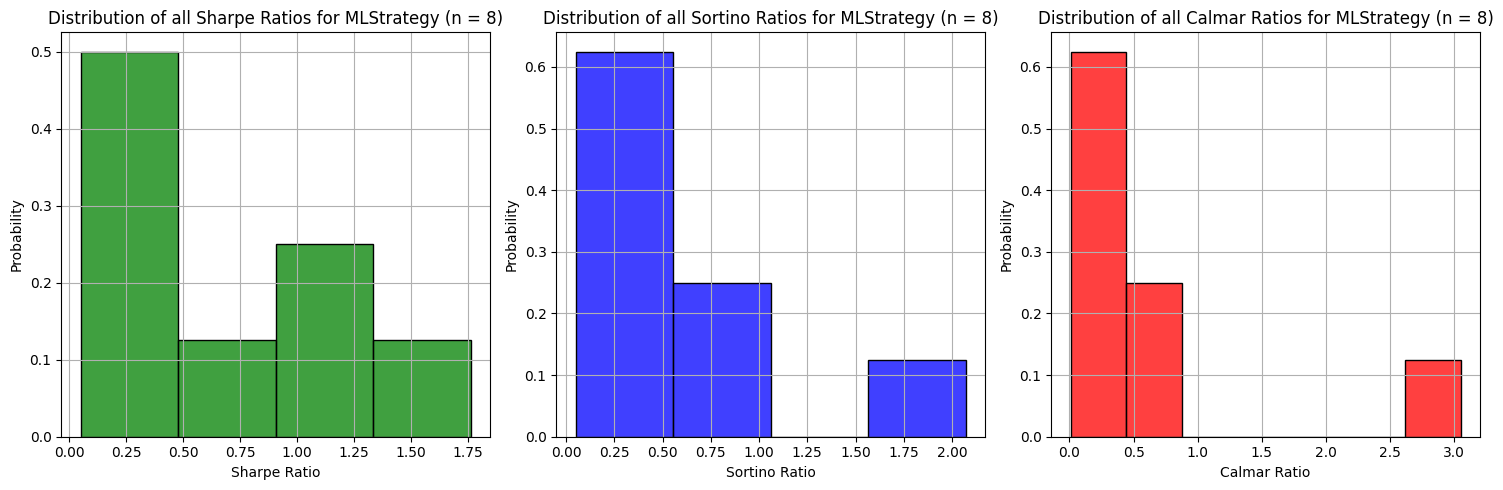

In [103]:
plot_overall_performance_metrics()

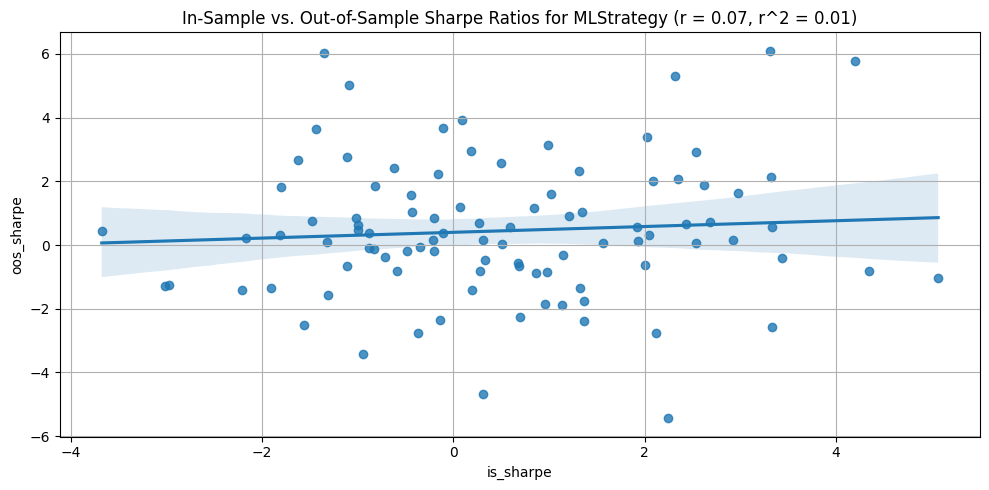

In [104]:
plot_in_sample_vs_out_of_sample_sharpe_ratios()

/var/folders/bn/k4t28qzx3qx1l712qxdnrxcm0000gn/T/ipykernel_28632/2393818865.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buy_and_hold_equity_curve['equity'] = 10_000 * (1 + buy_and_hold_equity_curve['price_close'].pct_change().fillna(0)).cumprod()


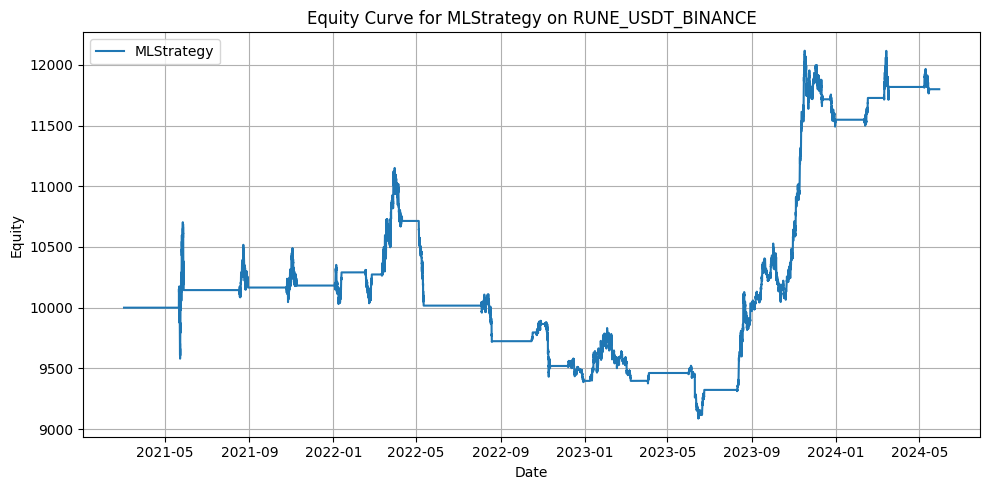

In [48]:
plot_strategy_equity_curve()

In [24]:
# Win Rate
win_rate = (trades_data['pnl_pct'] > 0).mean()
print(f'Win Rate: {win_rate:.2f}')

Win Rate: 0.65


In [25]:
len(trades_data)

422

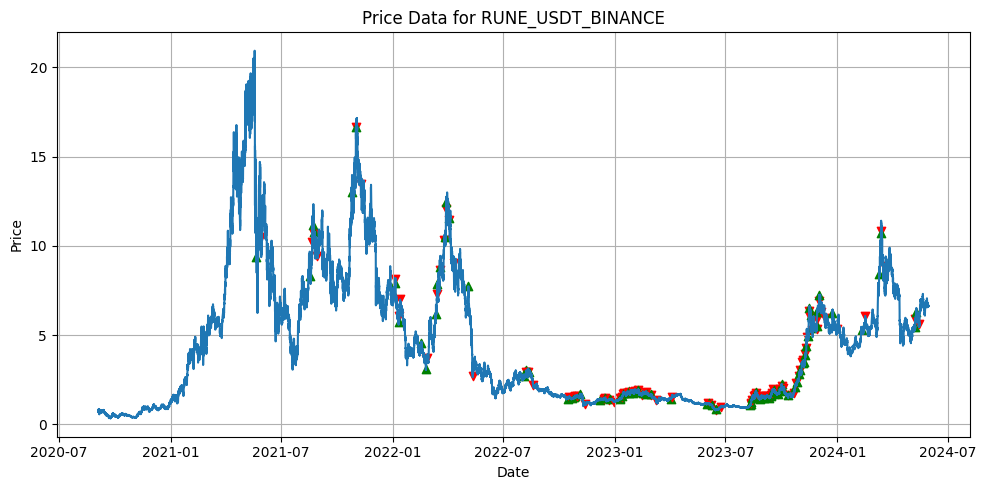

In [49]:
plot_price_data()

In [18]:
trades_data['trade_duration'] = (trades_data['exit_date'] - trades_data['entry_date']).dt.total_seconds() / (60 * 60 * 24)

# Average trade duration in days for profitable trades
print(trades_data[trades_data['pnl_pct'] > 0]['trade_duration'].mean())
# Average trade duration in days for losing trades
print(trades_data[trades_data['pnl_pct'] < 0]['trade_duration'].mean())


2.4727037712895372
5.041948198198199


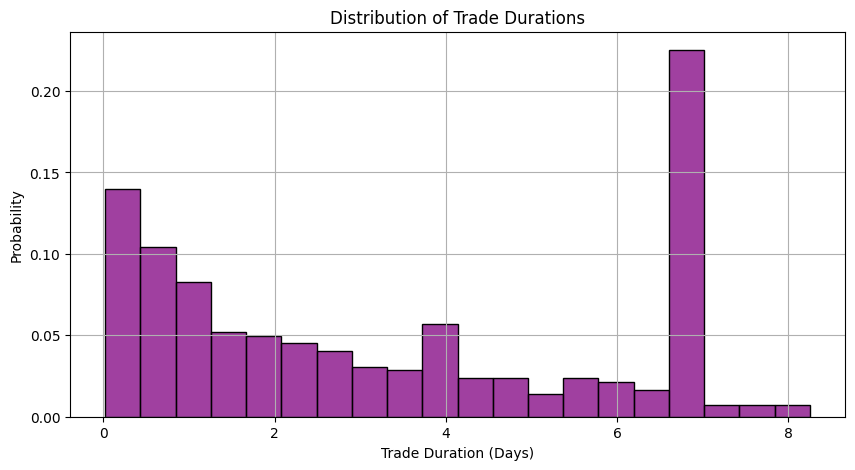

In [19]:
# distribution of trade durations
trade_durations = trades_data['exit_date'] - trades_data['entry_date']
trade_durations = trade_durations.dt.total_seconds() / (60 * 60 * 24)

plt.figure(figsize = (10, 5))
plt.title('Distribution of Trade Durations')
plt.xlabel('Trade Duration (Days)')
plt.grid()
sns.histplot(trade_durations, stat = 'probability', color = 'purple', bins = 20);


In [20]:
# Expectancy
prob_win = len(trades_data[trades_data['pnl'] > 0]) / len(trades_data)
prob_loss = len(trades_data[trades_data['pnl'] < 0]) / len(trades_data)
avg_win = trades_data[trades_data['pnl'] > 0]['pnl'].mean()
avg_loss = trades_data[trades_data['pnl'] < 0]['pnl'].mean()
expectancy = (prob_win * avg_win) - (prob_loss * avg_loss)

print(f'Expectancy: {expectancy:.2f}')

Expectancy: 142.06


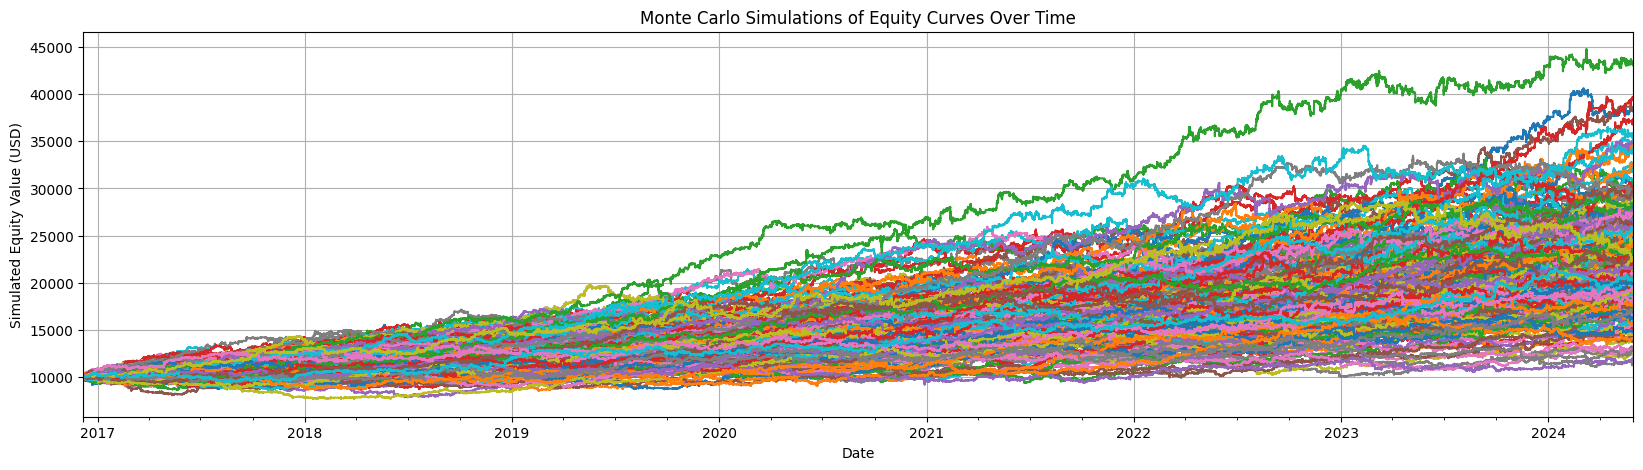

In [21]:
plot_monte_carlo_equity_curves()

Probability of Sharpe Ratio > 1: 0.57
Probability of Sortino Ratio > 1: 0.39
Probability of Calmar Ratio > 1: 0.28

Median Sharpe Ratio: 1.06
Median Sortino Ratio: 0.92
Median Calmar Ratio: 0.74

95% Confidence Interval for Sharpe Ratio: [0.31717915 1.78826028]
95% Confidence Interval for Sortino Ratio: [0.26587562 1.5631519 ]
95% Confidence Interval for Calmar Ratio: [0.12119861 1.82371831]


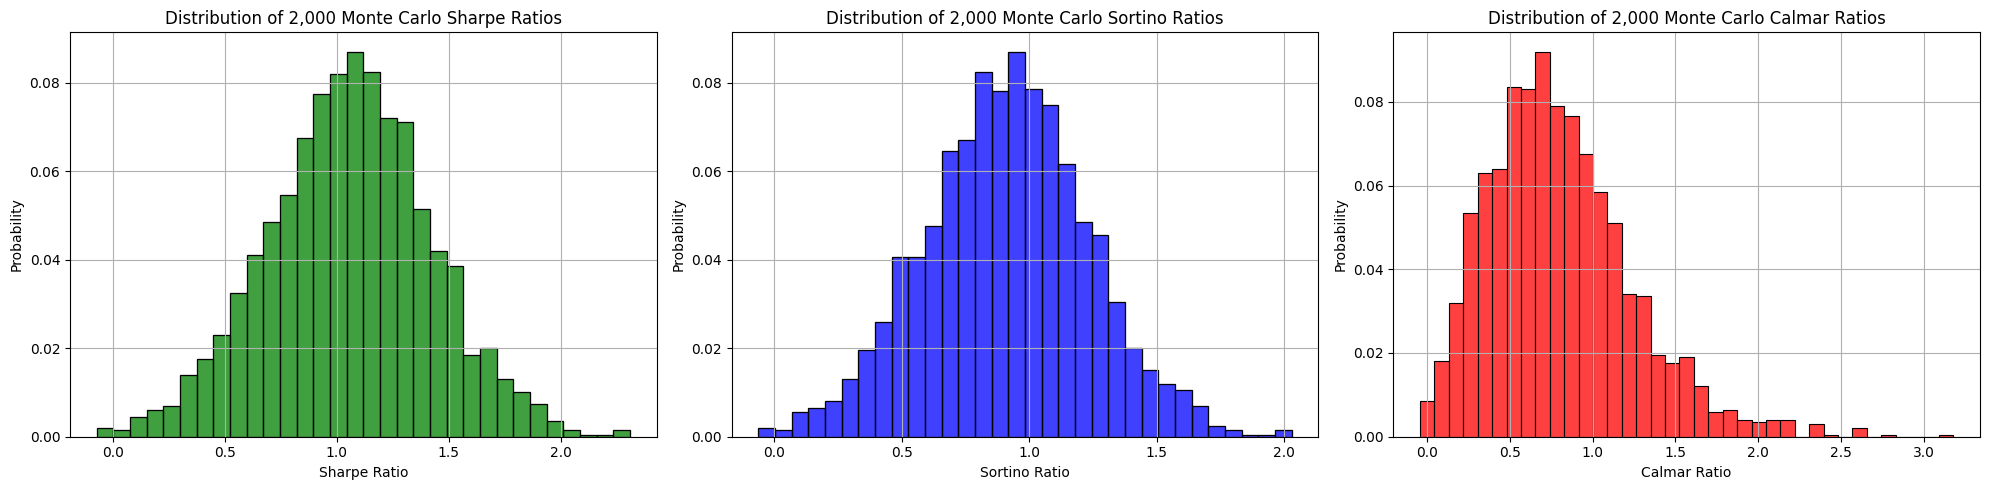

In [22]:
plot_bootstrapped_sharpe_sortino_calmar_ratios()

Risk of Ruin: 0.00

Median Avg. Drawdown: -3.72%
Median Max Drawdown: -14.59%

95% Confidence Interval for Avg. Drawdown: [-8.90485777 -2.13229068]
95% Confidence Interval for Max Drawdown: [-26.09331033  -9.3186282 ]


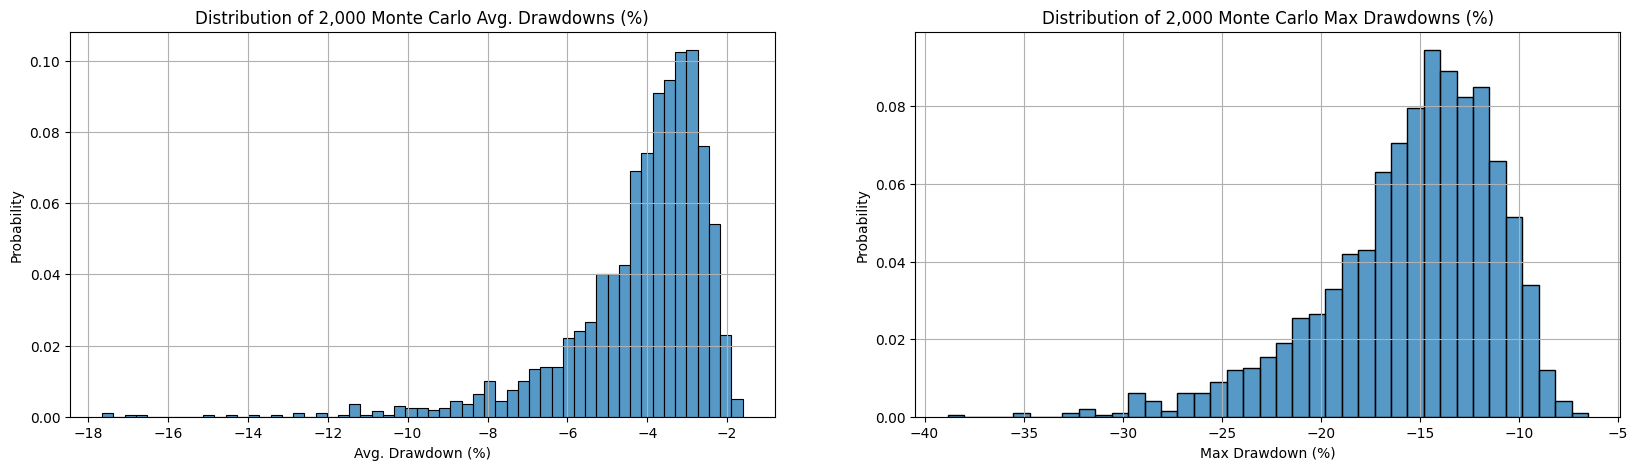

In [23]:
plot_bootstrapped_drawdowns()